In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [3]:
df.shape

(100000, 9)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

# **Data Preparation**
* Data Cleaning 
* Data Explorations

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.duplicated().sum()

3854

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(96146, 9)

In [13]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
###importing the visualization library
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

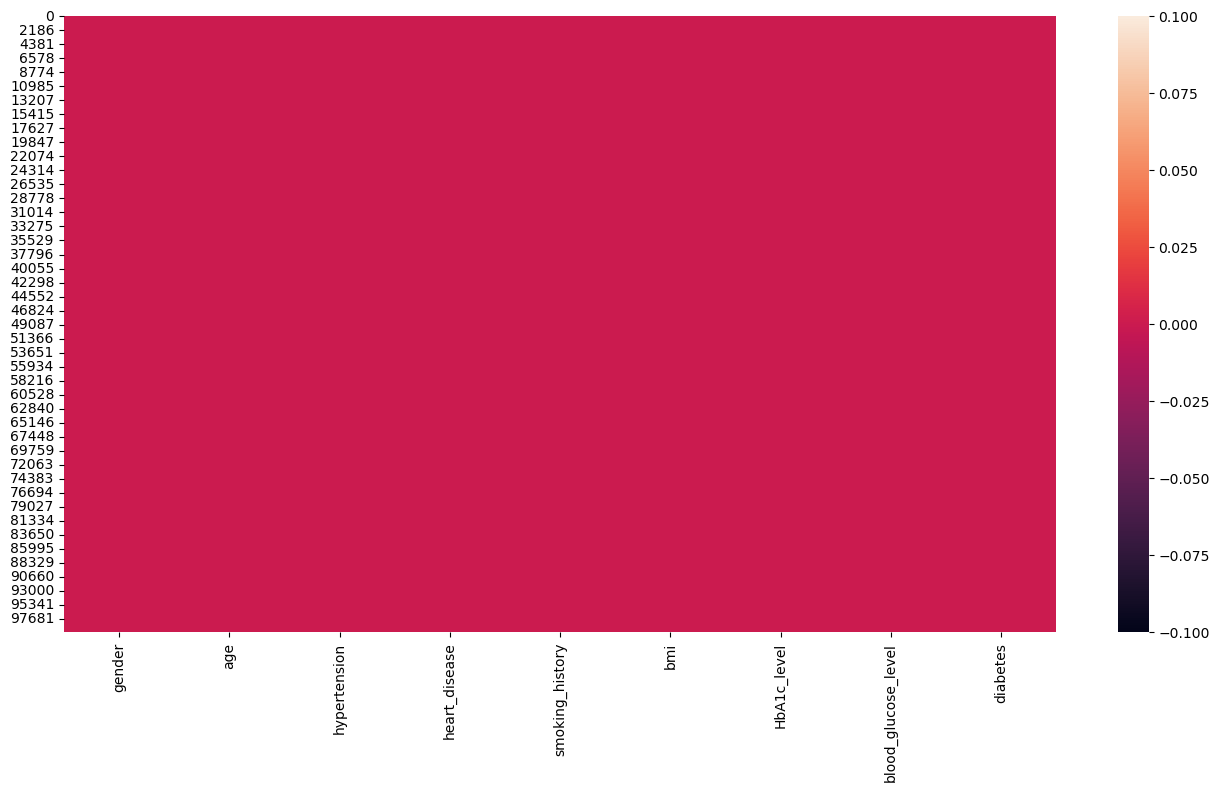

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

<Axes: xlabel='diabetes', ylabel='age'>

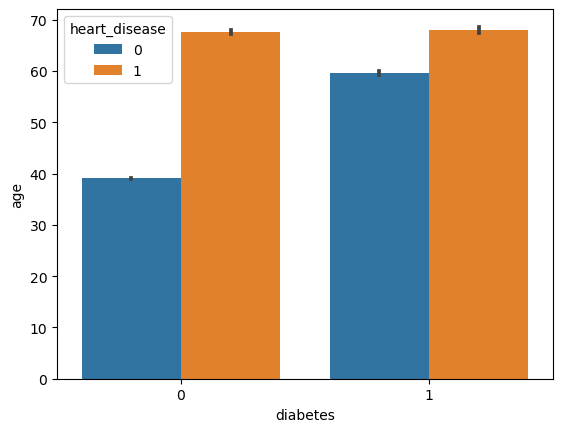

In [16]:
sns.barplot(x=df['diabetes'],y=df['age'],hue=df['heart_disease'])

In [17]:
num_var=[]
cat_var=[]

for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        num_var.append(c)

In [18]:
for c in df.columns:
    if df[c].dtype == 'object':
        cat_var.append(c)

In [19]:
[num_var,cat_var]

[['age',
  'hypertension',
  'heart_disease',
  'bmi',
  'HbA1c_level',
  'blood_glucose_level',
  'diabetes'],
 ['gender', 'smoking_history']]

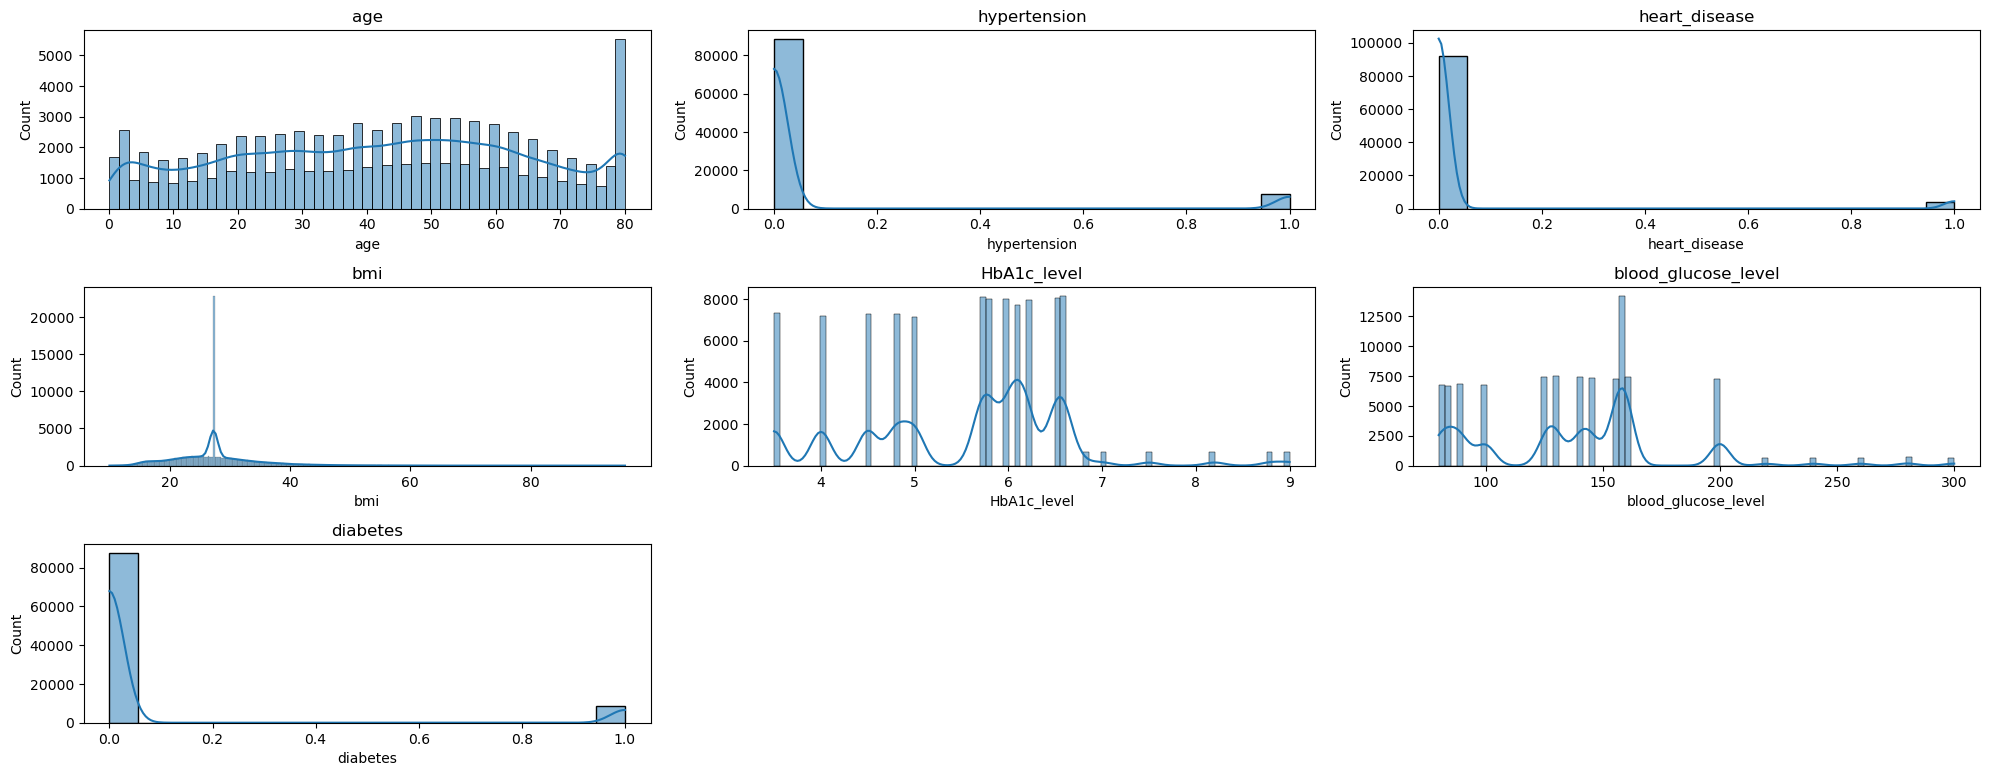

In [20]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(var)

plt.tight_layout()
plt.show()

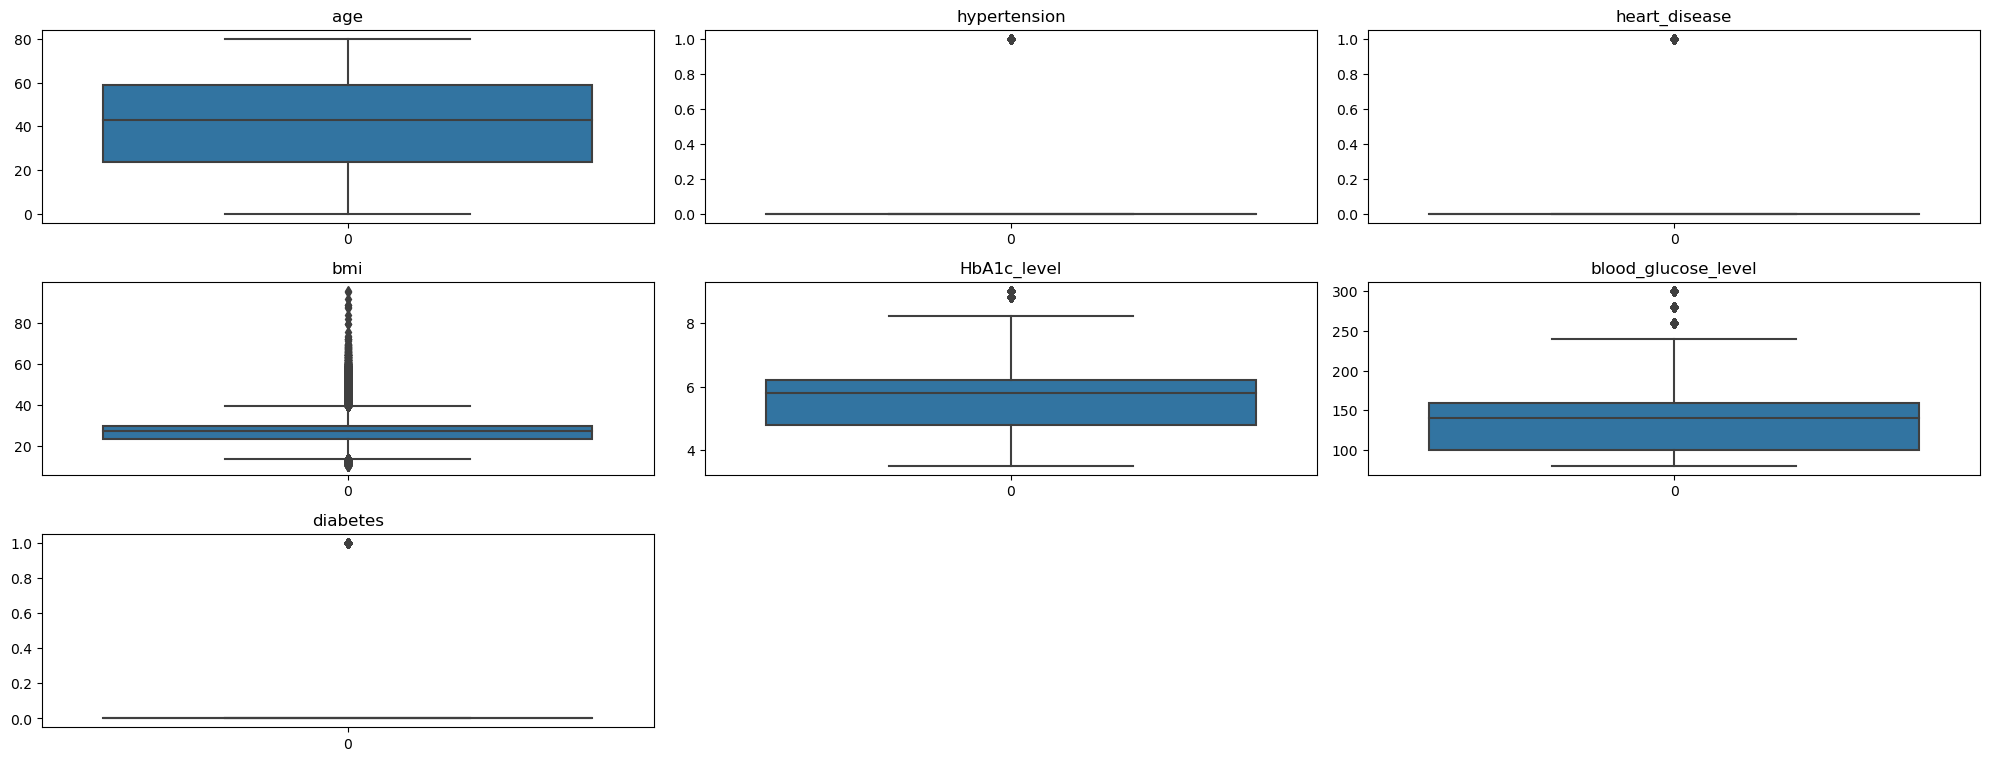

In [21]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 3, i+1)
    sns.boxplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

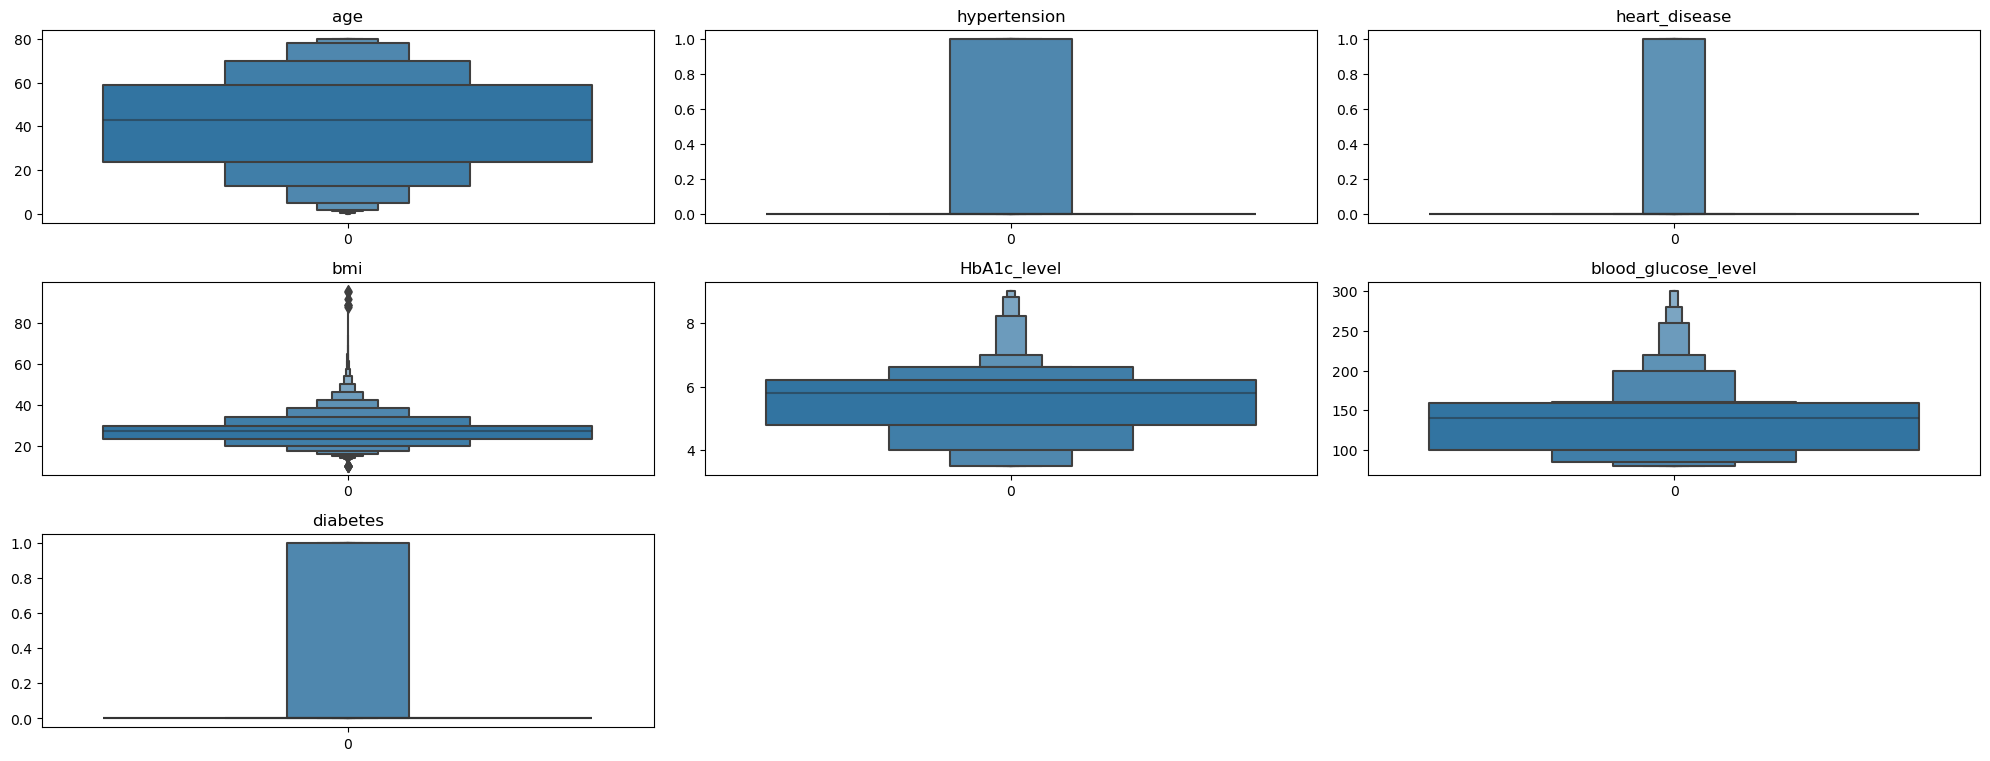

In [22]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 3, i+1)
    sns.boxenplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

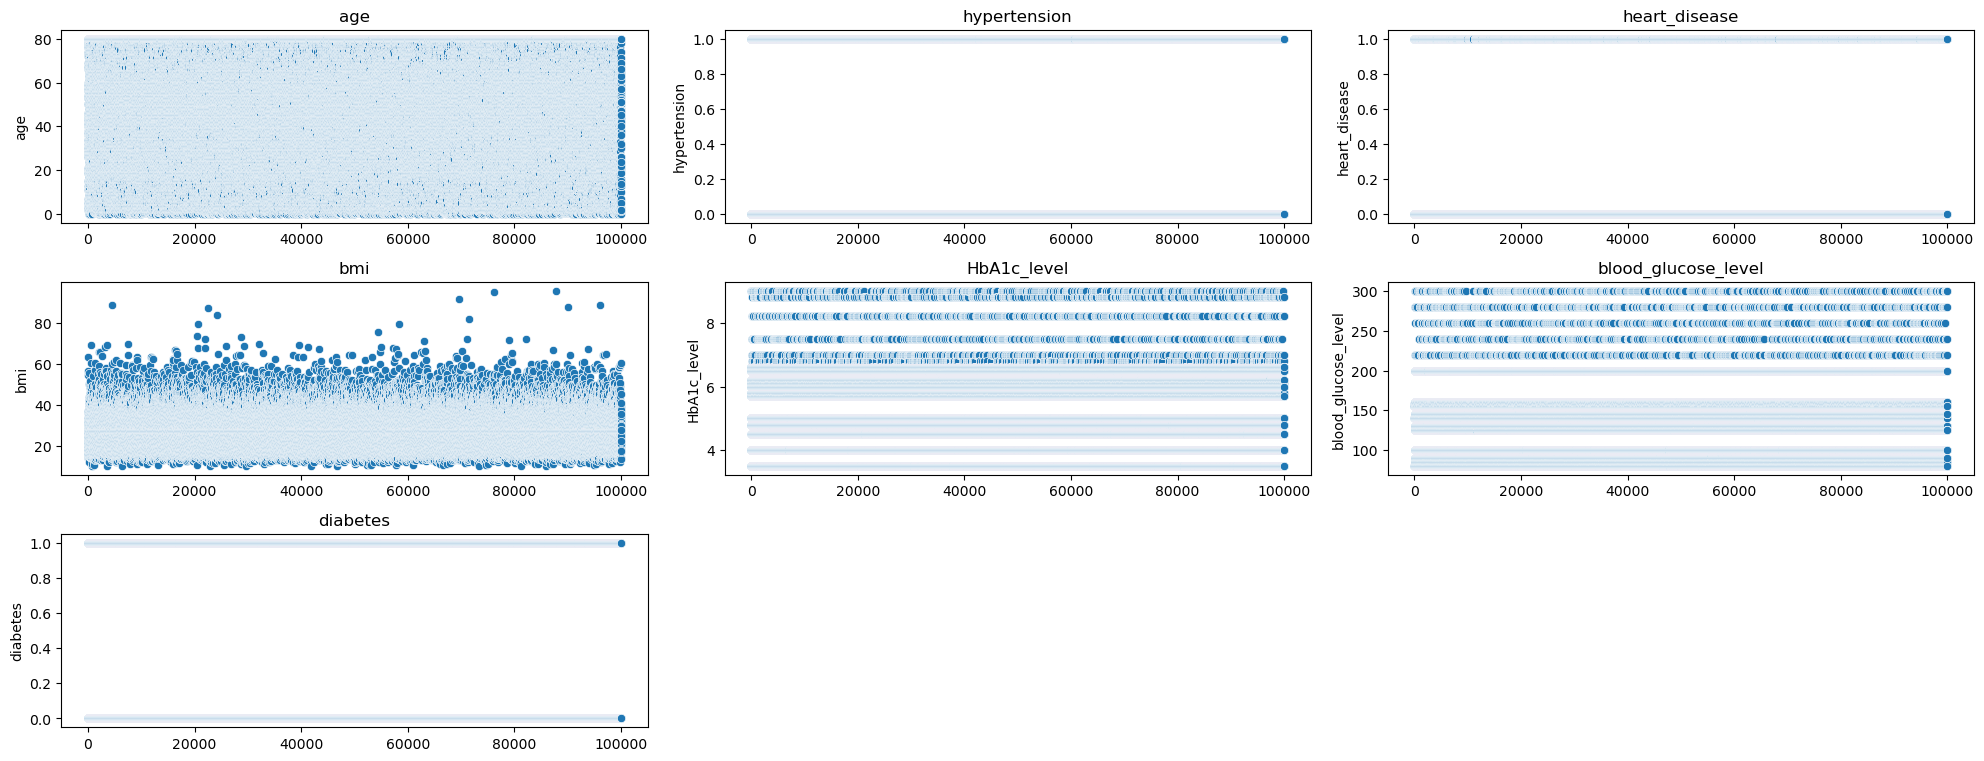

In [23]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

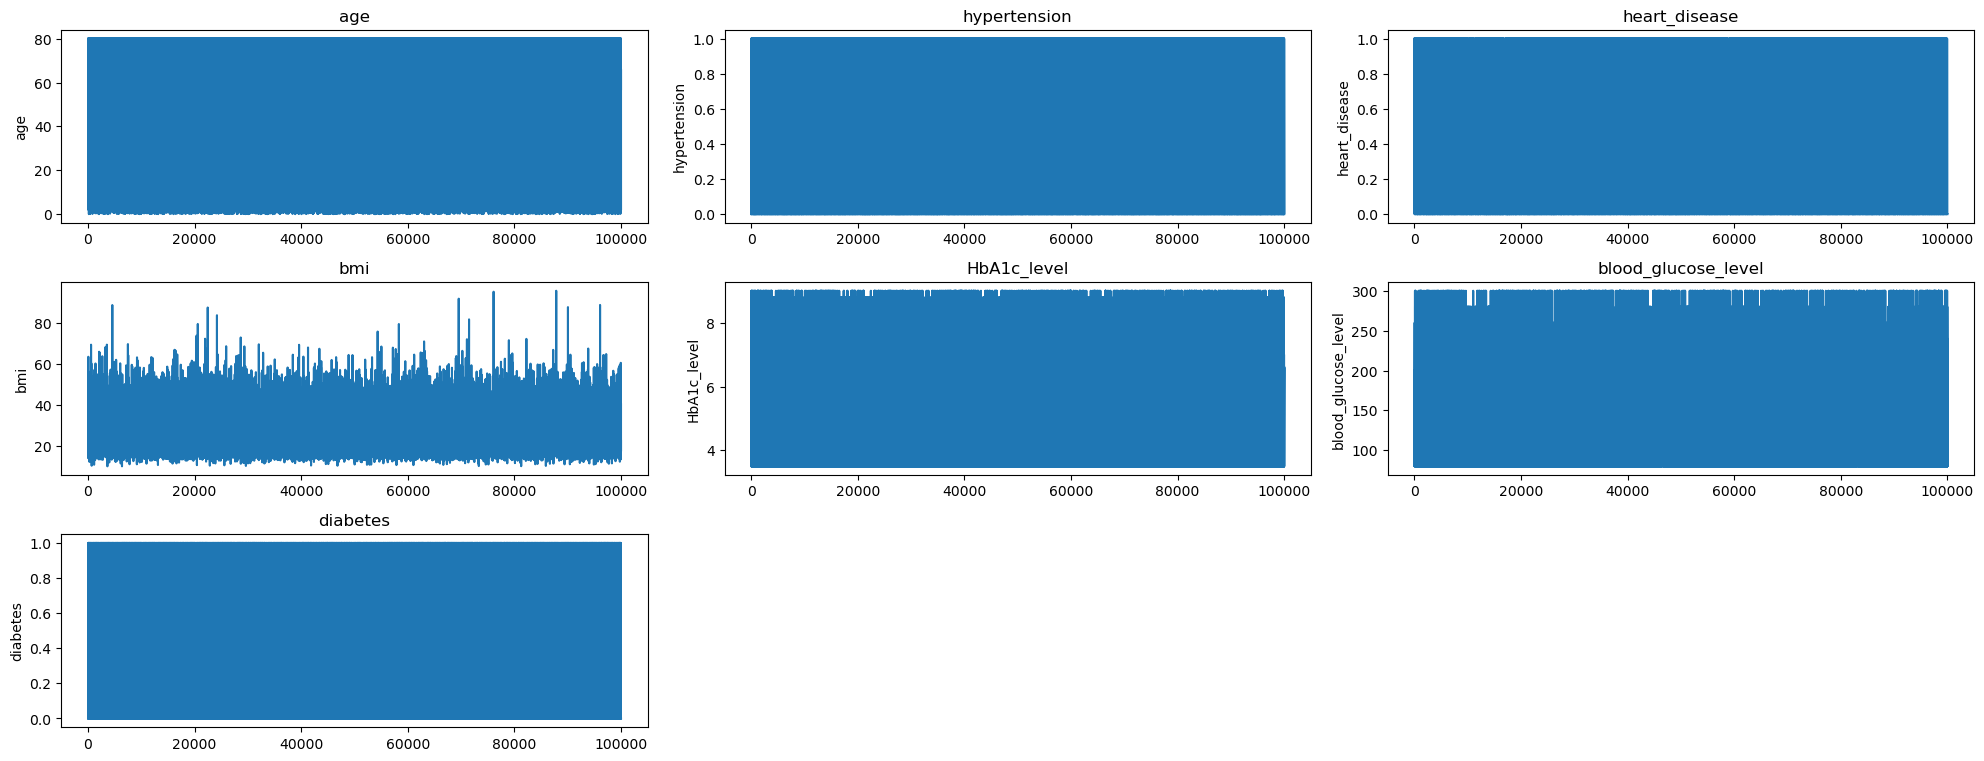

In [24]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 3, i+1)
    sns.lineplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

/tmp/ipykernel_20/301846673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

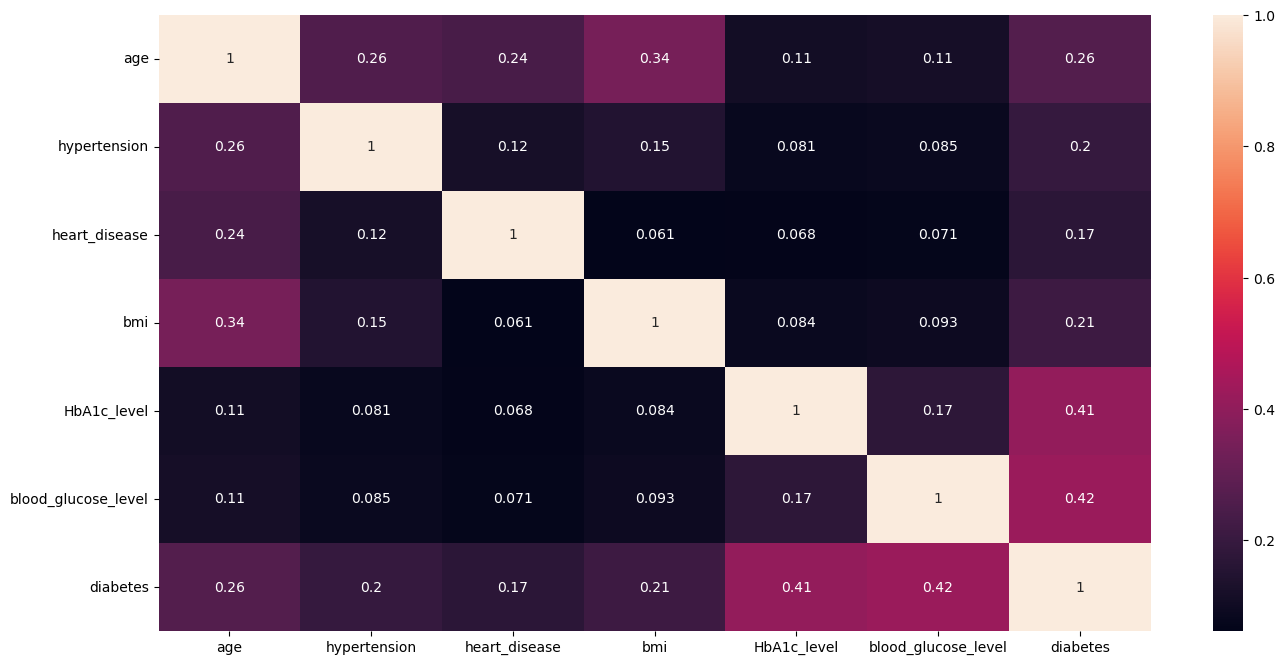

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

**Let's Split the dataset into two part which is train and test part**

In [26]:
X=df.drop(columns='diabetes')
y=df['diabetes']

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report
import xgboost

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
tf1=ColumnTransformer(transformers=[
    ('onh',OneHotEncoder(),[0,4]),
],remainder="passthrough")

**Logistic Regression**

In [30]:
pipe_lgr=Pipeline([
    ('tf1',tf1),
    ('lgr',LogisticRegression()),
])

In [31]:
pipe_lgr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('lgr', LogisticRegression())])

In [32]:
y_pred_lgr=pipe_lgr.predict(X_test)

In [33]:
score_lgr=accuracy_score(y_test,y_pred_lgr)

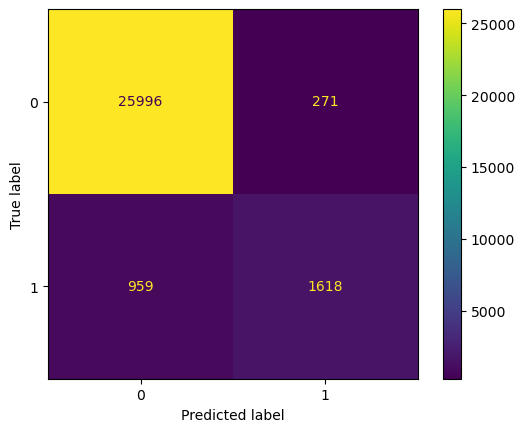

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

In [35]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26267
           1       0.86      0.63      0.72      2577

    accuracy                           0.96     28844
   macro avg       0.91      0.81      0.85     28844
weighted avg       0.95      0.96      0.95     28844



**Decision Tree Classifier**

In [36]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('dtc',DecisionTreeClassifier()),
])

In [37]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('dtc', DecisionTreeClassifier())])

In [38]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [39]:
score_dtc=accuracy_score(y_test,y_pred_dtc)

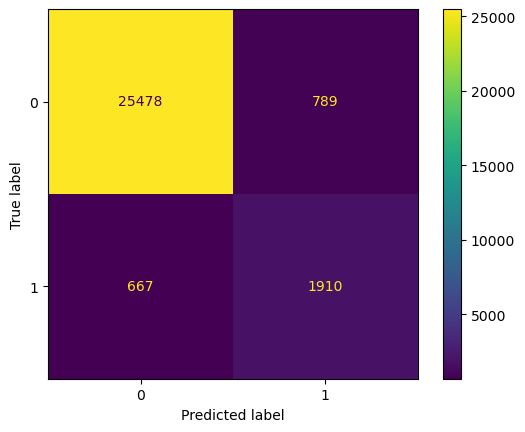

In [40]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

In [41]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     26267
           1       0.71      0.74      0.72      2577

    accuracy                           0.95     28844
   macro avg       0.84      0.86      0.85     28844
weighted avg       0.95      0.95      0.95     28844



**Random Forest Classifier**

In [42]:
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('rfc',RandomForestClassifier())
])

In [43]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('rfc', RandomForestClassifier())])

In [44]:
y_pred_rfc=pipe_rfc.predict(X_test)

In [45]:
score_rfc=accuracy_score(y_test,y_pred_rfc)

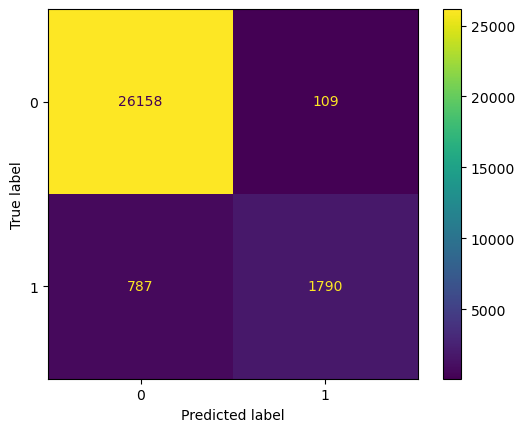

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

In [47]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.94      0.69      0.80      2577

    accuracy                           0.97     28844
   macro avg       0.96      0.85      0.89     28844
weighted avg       0.97      0.97      0.97     28844



**AdaBoosting Classifier**

In [48]:
pipe_ada=Pipeline([
    ('tf1',tf1),
    ('ada',AdaBoostClassifier())
])

In [49]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('ada', AdaBoostClassifier())])

In [50]:
y_pred_ada=pipe_ada.predict(X_test)

In [51]:
score_ada=accuracy_score(y_test,y_pred_ada)

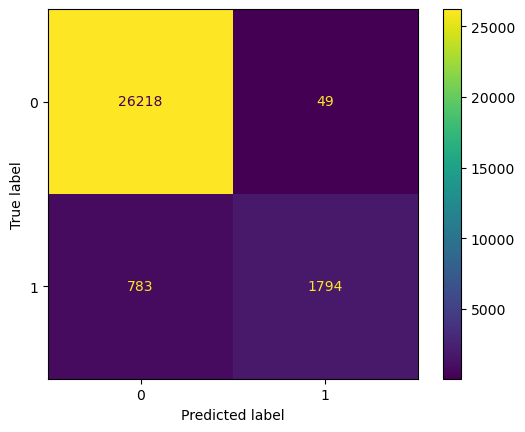

In [52]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ada)).plot()

In [53]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.97      0.70      0.81      2577

    accuracy                           0.97     28844
   macro avg       0.97      0.85      0.90     28844
weighted avg       0.97      0.97      0.97     28844



**GradientBoosting Classifier**

In [54]:
pipe_gbc=Pipeline([
    ('tf1',tf1),
    ('gbc',GradientBoostingClassifier(n_estimators=200,learning_rate=0.05))
])

In [55]:
pipe_gbc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200))])

In [56]:
y_pred_gbc=pipe_gbc.predict(X_test)

In [57]:
score_gbc=accuracy_score(y_test,y_pred_gbc)
score_gbc

0.9712938566079601

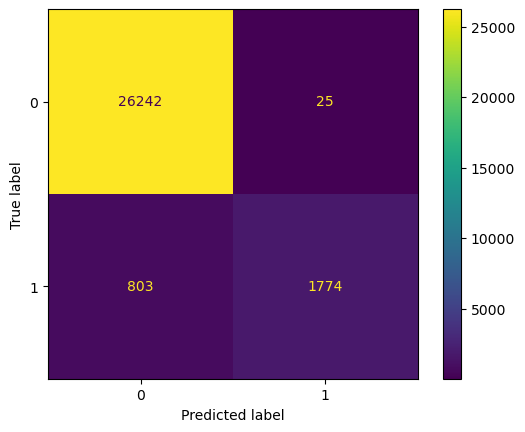

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gbc)).plot()

In [59]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.99      0.69      0.81      2577

    accuracy                           0.97     28844
   macro avg       0.98      0.84      0.90     28844
weighted avg       0.97      0.97      0.97     28844



**Bagging Classifier**

In [60]:
pipe_bgg=Pipeline([
    ('tf1',tf1),
    ('bgg',BaggingClassifier(estimator=GradientBoostingClassifier()))
])

In [61]:
pipe_bgg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('bgg',
                 BaggingClassifier(estimator=GradientBoostingClassifier()))])

In [62]:
y_pred_bgg=pipe_bgg.predict(X_test)

In [63]:
score_bgg=accuracy_score(y_test,y_pred_bgg)

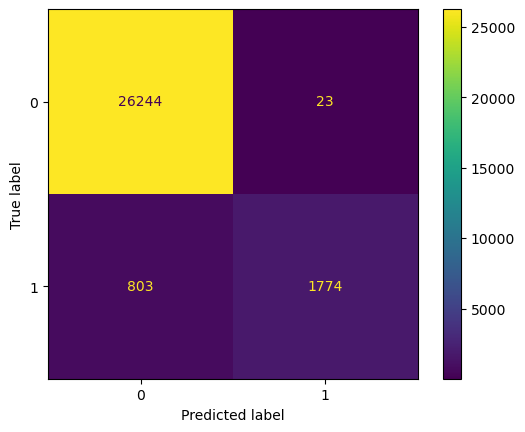

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

In [65]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.99      0.69      0.81      2577

    accuracy                           0.97     28844
   macro avg       0.98      0.84      0.90     28844
weighted avg       0.97      0.97      0.97     28844



**XGBoosting Classifier**

In [66]:
pipe_xgb=Pipeline([
    ('tf1',tf1),
    ('xgbc',xgboost.XGBClassifier())
])

In [67]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4])])),
                ('xgbc',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id...e,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [68]:
y_pred_xgb=pipe_xgb.predict(X_test)

In [69]:
score_xgb=accuracy_score(y_test,y_pred_xgb)

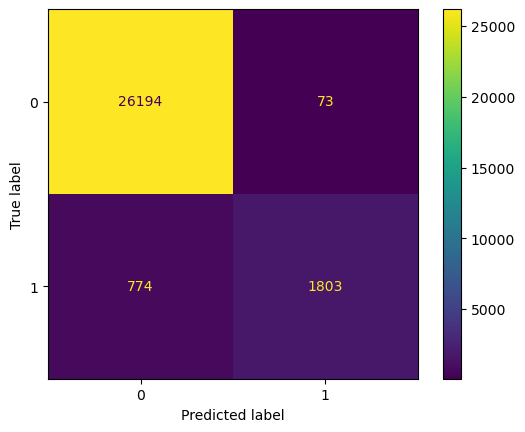

In [70]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgb)).plot()

In [71]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26267
           1       0.96      0.70      0.81      2577

    accuracy                           0.97     28844
   macro avg       0.97      0.85      0.90     28844
weighted avg       0.97      0.97      0.97     28844



In [72]:
s={
    'Model Name':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','AdaBoosting Classifier','Gradient Boosting classifier','Bagging Classifier','XGBoosting Classifier'],
    'Score':[score_lgr,score_dtc,score_rfc,score_ada,score_gbc,score_bgg,score_xgb]
}

In [73]:
sc=pd.DataFrame(s)
sc

,Model Name,Score
0,Logistic Regression,0.957357
1,Decision Tree Classifier,0.949522
2,Random Forest Classifier,0.968936
3,AdaBoosting Classifier,0.971155
4,Gradient Boosting classifier,0.971294
5,Bagging Classifier,0.971363
6,XGBoosting Classifier,0.970635


**As we can see from above table that our ideal model is gradiant Boosting Classifier**

In [74]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
50432,Male,59.0,0,0,never,31.20,6.6,200,1
74895,Female,78.0,0,0,No Info,27.32,5.0,200,0
47202,Female,24.0,0,0,No Info,27.32,6.5,90,0
9102,Female,28.0,0,0,No Info,21.76,4.8,130,0
74597,Female,28.0,0,0,never,18.36,5.8,100,0


In [75]:
pipe_gbc.predict(pd.DataFrame([['Female',80.0,0,1,'never',23.82,4.5,130]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([0])

In [76]:
pipe_gbc.predict(pd.DataFrame([['Male',18.0,0,0,'never',19.22,3.5,200]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([0])

In [77]:
pipe_gbc.predict(pd.DataFrame([['Female',80.0,0,0,'No Info',26.36,7.5,159]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([1])

In [78]:
pipe_gbc.predict(pd.DataFrame([['Female',57.0,0,0,'never',30.21,9.0,220]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([1])

**Let's Dump This model for web application**

In [79]:
import pickle as pkl

In [80]:
pkl.dump(pipe_gbc,open("model_gbc.pkl",'wb'))

In [81]:
model=pkl.load(open('model_gbc.pkl','rb'))

In [82]:
model.predict(pd.DataFrame([['Female',57.0,0,0,'never',30.21,9.0,220]],columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level']))

array([1])